In [71]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
from sklearn.tree import DecisionTreeRegressor  # model
from matplotlib import pyplot as plt  # visualization
from sklearn.tree import plot_tree  # visualize tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# "Red Wine Quality" Dataset 
(https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download)

In [72]:
df = pd.read_csv('/content/sample_data/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [73]:
df1 = df.loc[df.index.isin([i for i in range(1000)])]
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.7,0.60,0.06,2.00,0.079,19.0,41.0,0.99697,3.39,0.62,10.1,6
996,5.6,0.66,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7
997,5.6,0.66,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7
998,8.9,0.84,0.34,1.40,0.050,4.0,10.0,0.99554,3.12,0.48,9.1,6


In [74]:
print(df1.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


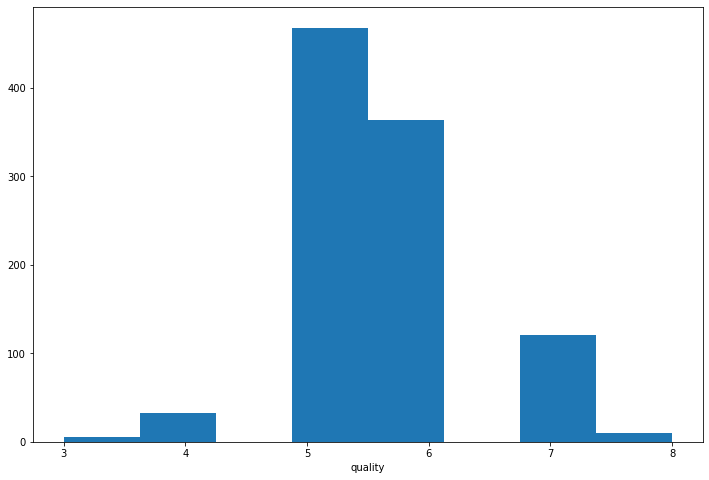

In [75]:
quality = df1['quality']
plt.figure(figsize=(12, 8))
plt.hist(quality,max(quality))
plt.xlabel("quality")
plt.show()

In [76]:
model = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    max_depth = 5
)

# CART algorithm that builds the tree based on our data
model.fit(
    X=df1.drop(columns=['quality']), 
    y=df1['quality']
)

DecisionTreeRegressor(max_depth=5)

In [77]:
score = cross_val_score(model, df1.drop(columns=['quality']), df1['quality'], cv=5)
print(score)
print(f"standard deviation of {score.std()}" )

[-0.24576375 -0.01934478  0.2288749   0.02481417  0.26432111]
standard deviation of 0.18484983141869632


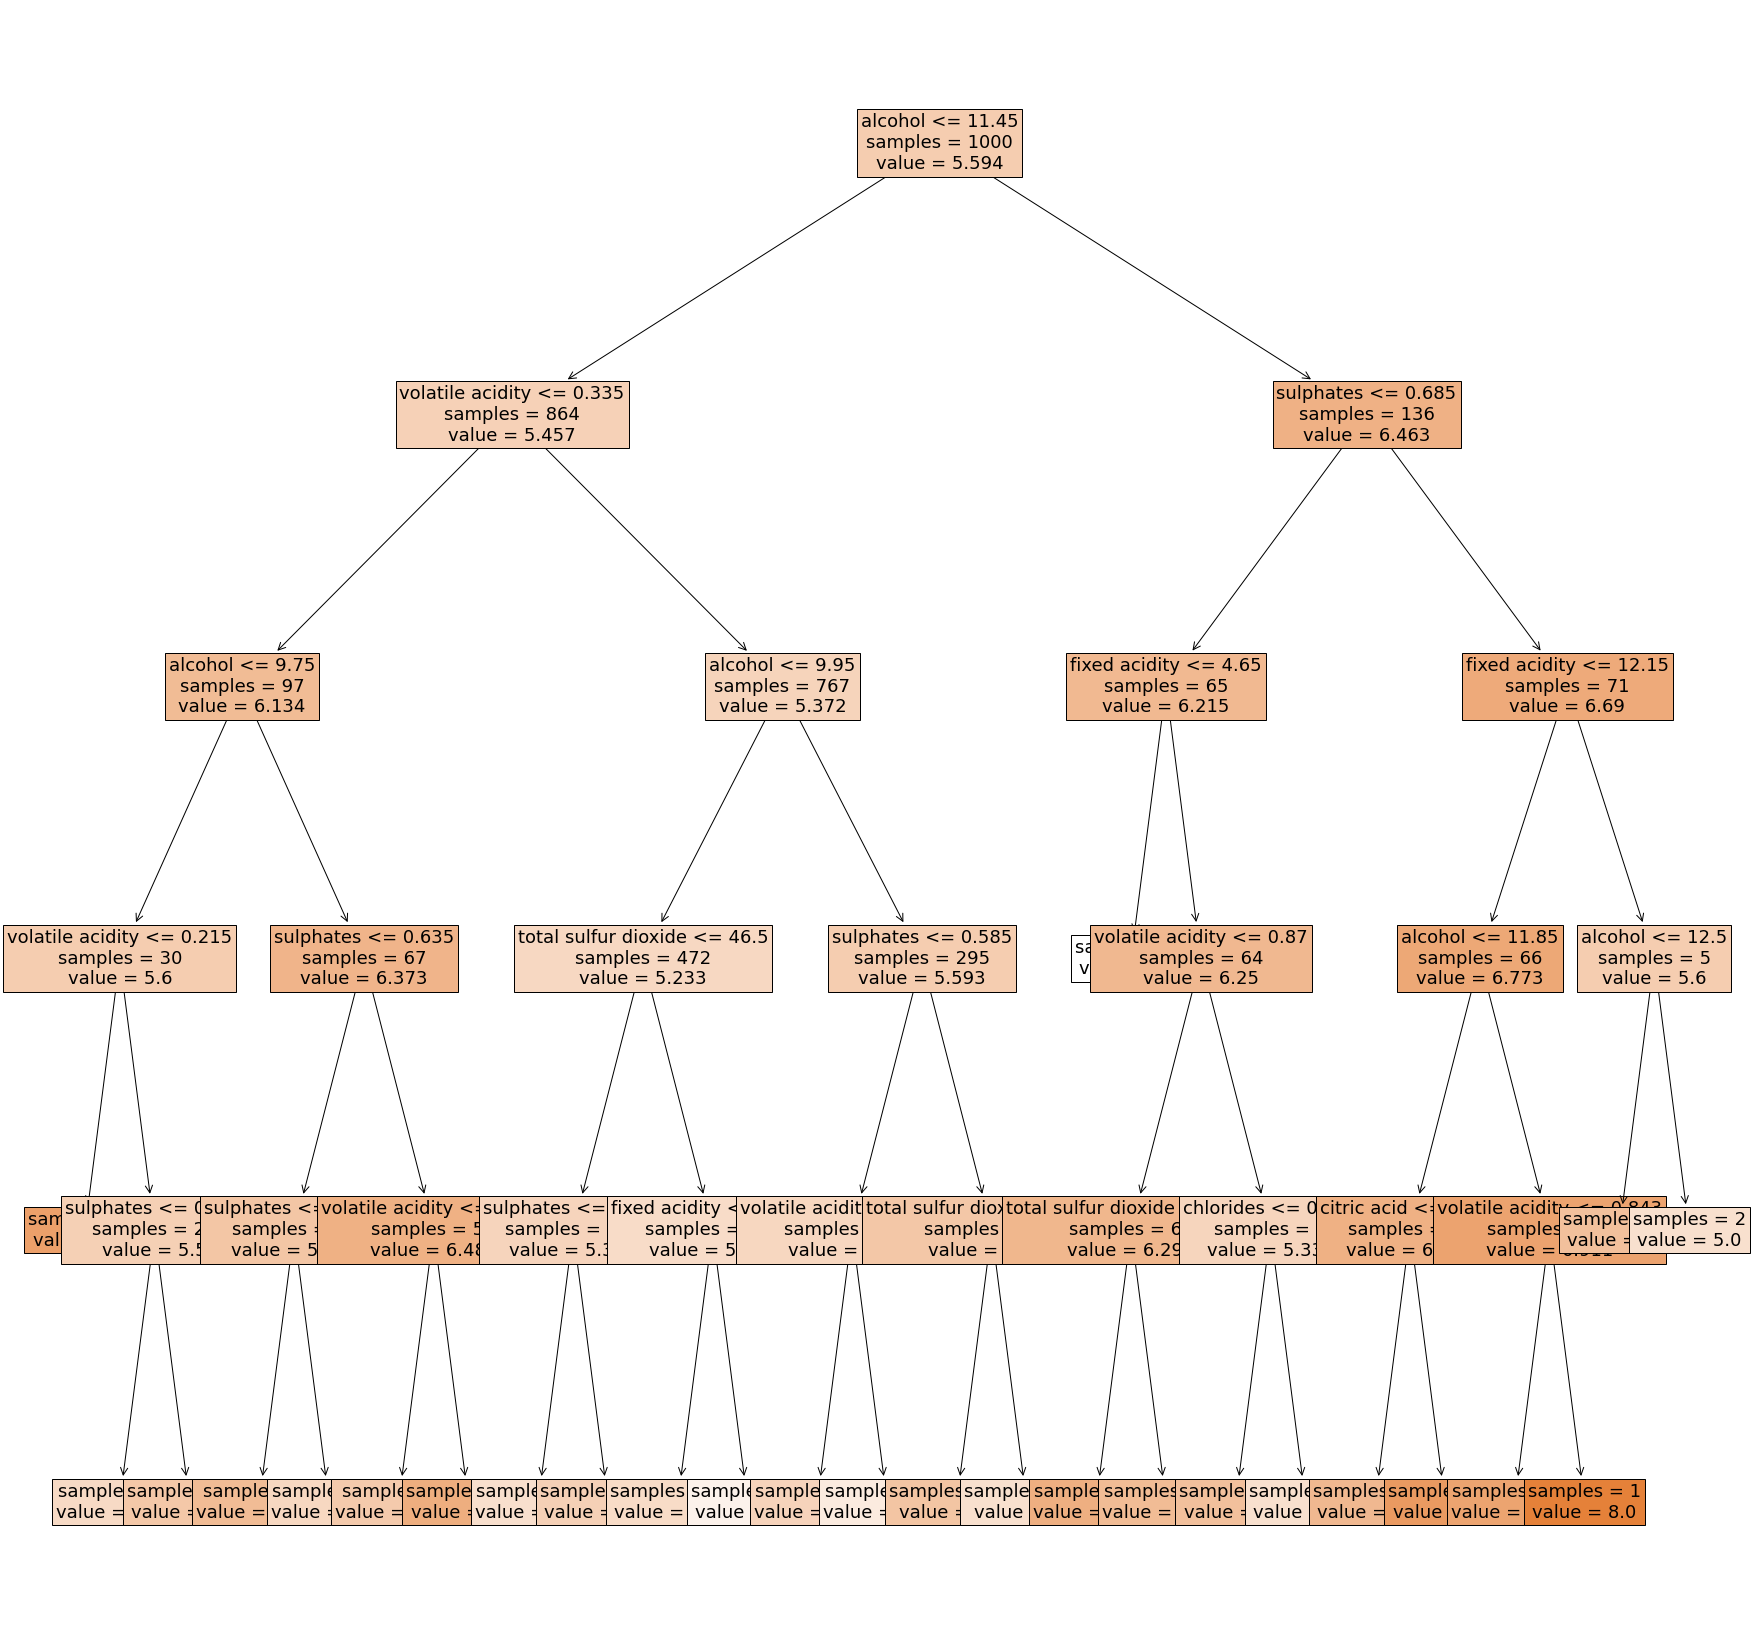

In [78]:
plt.figure(figsize=(30, 30))
plot_tree(
    model,
    feature_names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'],
    impurity=False,
    filled=True,
    fontsize=18
)
plt.show()

In [79]:
df_test = df.loc[df.index.isin([i for i in range(1000,1600)])]
df_test


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1000,7.5,0.430,0.30,2.20,0.062,6.0,12.0,0.99495,3.44,0.72,11.5,7
1001,9.9,0.350,0.38,1.50,0.058,31.0,47.0,0.99676,3.26,0.82,10.6,7
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
1003,6.8,0.360,0.32,1.80,0.067,4.0,8.0,0.99280,3.36,0.55,12.8,7
1004,8.2,0.430,0.29,1.60,0.081,27.0,45.0,0.99603,3.25,0.54,10.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.00,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.20,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.00,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5



# Regression metrics:
_________________________________________________________________
# mean_squared_error :
 The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
_________________________________________________________________
#R² score : 
the coefficient of determination The r2_score function computes the coefficient of determination, usually denoted as R².

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent,R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected (average) value of y, disregarding the input features, would get an R² score of 0.0.





In [80]:
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
y_true,y_pred = [],[]
for i in df_test.index:
  inputs = pd.DataFrame([{"fixed acidity":df_test["fixed acidity"][i] , "volatile acidity": df_test["volatile acidity"][i],"citric acid":df_test["citric acid"][i],"residual sugar":df_test["residual sugar"][i],"chlorides":df_test["chlorides"][i],"free sulfur dioxide":df_test["free sulfur dioxide"][i],"total sulfur dioxide":df_test["total sulfur dioxide"][i],"density":df_test["density"][i],"pH":df_test["pH"][i],"sulphates": df_test["sulphates"][i],"alcohol": df_test["alcohol"][i]}])
  '''
  use the predict method to derive the SalePrice
  y_pred - A list of the values ​​that the model predicted 
  y_true - A list of the actual values

  '''
  prediction = model.predict(inputs)
  y_pred.append(prediction)
  y_true.append(df_test['quality'][i])
  # print(f"Predicted SalePrice: {prediction} , Real SalePrice: {df_test['SalePrice'][i]}")

'''
Calculation of MSE and R2
'''
#MSE
mse = mean_squared_error(y_true, y_pred,squared=False)
print(f"mean_squared_error(y_true, y_pred): {mse}")
#R2
r2 = r2_score(y_true, y_pred)
print(f"r2_score(y_true, y_pred): {r2}")
# r2_score(y_true, y_pred, multioutput='uniform_average')

mean_squared_error(y_true, y_pred): 0.7015732444909466
r2_score(y_true, y_pred): 0.2634517272952889


In [81]:
from tabulate import tabulate
print(tabulate([[mse,r2]], headers=["MSE","R2"], tablefmt="grid"))

+----------+----------+
|      MSE |       R2 |
+==========+==========+
| 0.701573 | 0.263452 |
+----------+----------+


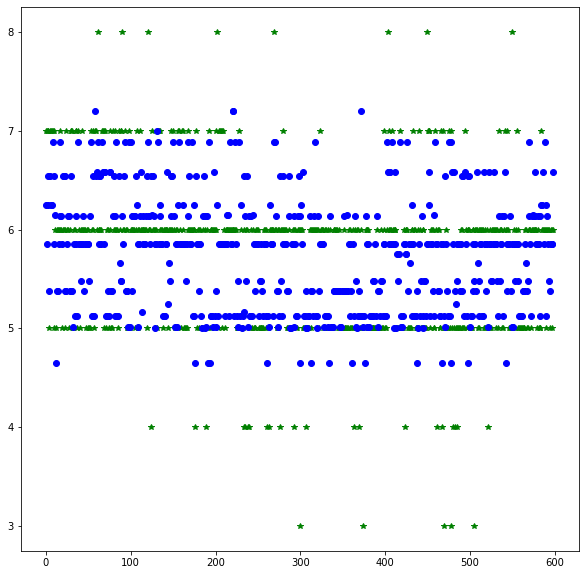

In [82]:
plt.figure(figsize=(10, 10))
plt.plot(y_true,'g*', y_pred, 'bo')
plt.show()

In [83]:
# pip install --upgrade linear-tree

In [84]:
from lineartree import LinearTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

In [85]:
df = pd.read_csv('/content/sample_data/winequality-red.csv')
df_regressor = df.loc[df.index.isin([i for i in range(1000)])]

In [86]:
regressor = LinearTreeRegressor(base_estimator=LinearRegression())
regressor.fit(
    X=df_regressor.drop(columns=['quality']), 
    y=df_regressor['quality']
)


LinearTreeRegressor(base_estimator=LinearRegression())

using 5-fold CV

In [87]:
score = cross_val_score(regressor, df_regressor.drop(columns=['quality']), df_regressor['quality'], cv=5)
print(score)
print(f"standard deviation of {score.std()}")

[-0.3740144  -0.13942442 -0.06679354 -0.27543991  0.23933266]
standard deviation of 0.21021878240294192


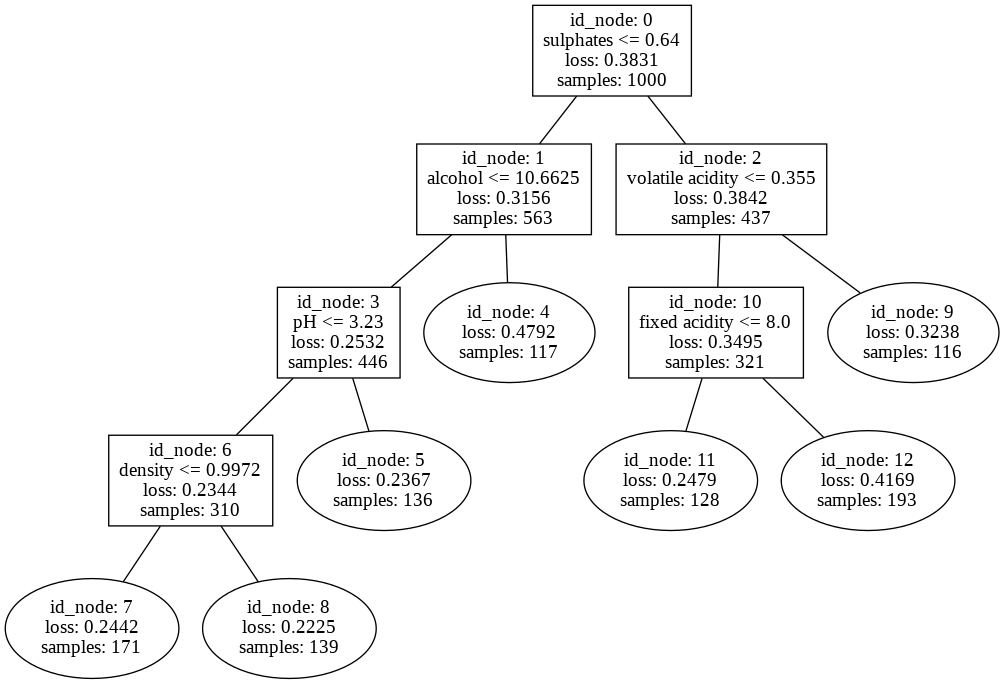

In [88]:
regressor.plot_model(feature_names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])


In [89]:
df_test = df.loc[df.index.isin([i for i in range(1000,1600)])]


In [90]:
y_true,y_pred_regressor = [],[]
for i in df_test.index:
  # print({"NewConstruction": df_test["NewConstruction"][i], "Pool": df_test["Pool"][i],"OverallQual":df_test["OverallQual"][i],"OverallCond":df_test["OverallCond"][i],"ExterQual":df_test["ExterQual"][i],"ExterCond":df_test["ExterCond"][i],"Heating":df_test["Heating"][i], "LotArea": df_test["LotArea"][i]})
  inputs = pd.DataFrame([{"fixed acidity":df_test["fixed acidity"][i] , "volatile acidity": df_test["volatile acidity"][i],"citric acid":df_test["citric acid"][i],"residual sugar":df_test["residual sugar"][i],"chlorides":df_test["chlorides"][i],"free sulfur dioxide":df_test["free sulfur dioxide"][i],"total sulfur dioxide":df_test["total sulfur dioxide"][i],"density":df_test["density"][i],"pH":df_test["pH"][i],"sulphates": df_test["sulphates"][i],"alcohol": df_test["alcohol"][i]}])
  '''
  use the predict method to derive the SalePrice
  y_pred_regressor - A list of the values ​​that the model predicted 
  y_true - A list of the actual values

  '''
  prediction = regressor.predict(inputs)
  y_pred_regressor.append(prediction)
  y_true.append(df_test['quality'][i])
  # print(f"Predicted SalePrice: {prediction} , Real SalePrice: {df_test['SalePrice'][i]}")

'''
Calculation of MSE and R2
'''
#MSE
mse_regressor = mean_squared_error(y_true, y_pred_regressor,squared=False)
print(f"mean_squared_error(y_true, y_pred_regressor): {mse_regressor}")
#R2
r2_regressor = r2_score(y_true, y_pred_regressor)
print(f"r2_score(y_true, y_pred_regressor): {r2_regressor}")
# r2_score(y_true, y_pred, multioutput='uniform_average')

mean_squared_error(y_true, y_pred_regressor): 0.7203823276741672
r2_score(y_true, y_pred_regressor): 0.22342880151911748


In the following graph the green stars mark the real value of the price and the blue dots the predicted value:



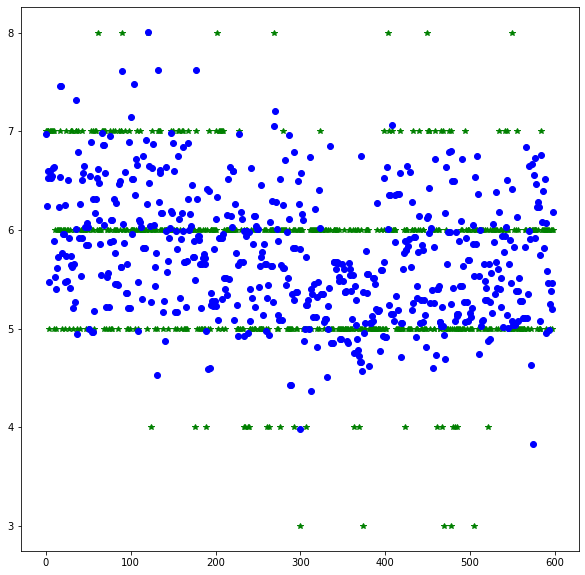

In [91]:
plt.figure(figsize=(10, 10))
plt.plot(y_true,'g*', y_pred_regressor, 'bo')
plt.show()

In [92]:
print(tabulate([[mse,mse_regressor,r2,r2_regressor]], headers=["MSE","MSE Linear Regression","R2", "R2 Linear Regression"], tablefmt="grid"))

+----------+-------------------------+----------+------------------------+
|      MSE |   MSE Linear Regression |       R2 |   R2 Linear Regression |
+==========+=========================+==========+========================+
| 0.701573 |                0.720382 | 0.263452 |               0.223429 |
+----------+-------------------------+----------+------------------------+
